In [63]:
from qiskit import BasicAer
from qiskit.aqua import aqua_globals, QuantumInstance
from qiskit.aqua.algorithms import NumPyMinimumEigensolver, VQE
from qiskit.aqua.components.optimizers import SLSQP
from qiskit.chemistry.components.initial_states import HartreeFock
from qiskit.chemistry.components.variational_forms import UCCSD
from qiskit.chemistry.drivers import PySCFDriver
from qiskit.chemistry.core import Hamiltonian, QubitMappingType


In [68]:
molecule = 'H .0 .0 -{0}; Li .0 .0 {0}'
distances = np.arange(0.5,4.25,0.25)
vqe_energies = []
hf_energies = []
exact_energies = []

In [69]:
for i,d in enumerate(distances):
    print('step',i)
    
    driver = PySCFDriver(molecule.format(d/2), basis='sto3g')
    qmolecule = driver.run()
    operator = Hamiltonian(qubit_mapping = QubitMappingType.PARITY, two_qubit_reduction=True, freeze_core=True,
                          orbital_reduction=[-3,-2])
    qubit_op , aux_ops = operator.run(qmolecule)
    
    exact_result = NumPyMinimumEigensolver(qubit_op, aux_operators=aux_ops).run()
    exacet_result = operator.process_algorithm_result(exact_result)
    
    optimizer = SLSQP(maxiter=1000)
    initial_state = HartreeFock(operator.molecule_info['num_orbitals'],
                                operator.molecule_info['num_particles'],
                                qubit_mapping=operator._qubit_mapping,
                                two_qubit_reduction=operator._two_qubit_reduction)
    var_form = UCCSD(num_orbitals=operator.molecule_info['num_orbitals'],
                num_particles=operator.molecule_info['num_particles'],
                initial_state=initial_state,
                qubit_mapping=operator._qubit_mapping,
                two_qubit_reduction=operator._two_qubit_reduction)
    algo = VQE(qubit_op, var_form, optimizer,aux_operators=aux_ops)
    vqe_result = algo.run(QuantumInstance(BasicAer.get_backend('statevector_simulator')))
    vqe_result = operator.process_algorithm_result(vqe_result)
#     print(exact_result['eigenvalue'])
#     break
    exact_energies.append(exact_result.eigenvalue)
    vqe_energies.append(vqe_result.energy)
    hf_energies.append(vqe_result.hartree_fock_energy)
    
    

step 0


/tmp/ipykernel_18101/352032786.py:6: DeprecationWarning: The Hamiltonian class is deprecated as of Qiskit Aqua 0.8.0 and will be removed no earlier than 3 months after the release date. Instead, the FermionicTransformation can be used.
  operator = Hamiltonian(qubit_mapping = QubitMappingType.PARITY, two_qubit_reduction=True, freeze_core=True,
/home/shreshtha13/.local/lib/python3.8/site-packages/qiskit/chemistry/core/hamiltonian.py:88: DeprecationWarning: The ChemistryOperator is deprecated as of Qiskit Aqua 0.8.0 and will be removed no earlier than 3 months after the release date. Instead, the FermionicTransformation can be used to transform QMolecules and construct ground state result objects.
  super().__init__()
/home/shreshtha13/.local/lib/python3.8/site-packages/qiskit/chemistry/core/chemistry_operator.py:170: DeprecationWarning: The qiskit.chemistry.chemistry_operator.MolecularChemistryResult object is deprecated as of 0.8.0 and will be removed no sooner than 3 months after the 

step 1
step 2
step 3
step 4
step 5
step 6
step 7
step 8
step 9
step 10
step 11
step 12
step 13
step 14


/home/shreshtha13/anaconda3/envs/qiskit/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


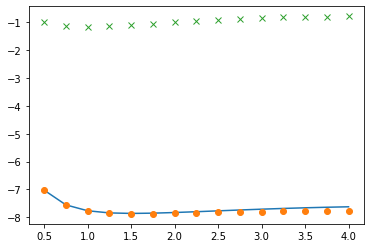

In [76]:
pylab.plot(distances, hf_energies, label='Hartree-Fock')
pylab.plot(distances,vqe_energies, 'o', label='VQE')
pylab.plot(distances, exact_energies, 'x', label='Exact')
# pylab.plot.ylim([-8,-7])
# print(exact_energies.shape)
# print(vqe_energies.shape)